In [1]:
%matplotlib inline
#!pip install pennylane
#!pip install qulacs pennylane-qulacs
#!pip install seaborn
#!pip install lightning
#!pip install ipynbname
#!pip install pandas
#!pip install yfinance

In [2]:
sessions = [
    {"optimizer" : "QNGOptimizer",
     "params" : {"approx" : 'block-diag', "lam" : 0},
     "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "AdamOptimizer",
     "params" : {"beta1" : 0.9, "beta2" : 0.99, "epsilon" : 1.0e-8},
     "params_name" : "$\mathit{"+ chr(946) + "}_1$=0.9, $\mathit{"+ chr(946) + "}_2$=0.99, $\mathit{"+ chr(949) +"}$=$10^{-8}$",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "MomentumOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "MomentumQNGOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9, approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]}
]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_239636\2682334514.py:4: SyntaxWarning: invalid escape sequence '\m'
  "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
C:\Users\mbrat\AppData\Local\Temp\ipykernel_239636\2682334514.py:8: SyntaxWarning: invalid escape sequence '\m'

In [3]:
from pennylane import numpy as np
init_count = 199
steps = 200

seed_value = 736520

#init_params_array = []
#np.random.seed(seed_value)
#for i in range(init_count):
#    init_params_array.append(np.random.rand((p+1)*N))

In [4]:
sessions_delta_energy = []

file1_name = "./portfolio_stepsize_delta_energy_2024-08-09.dat"
file1 = open(file1_name, "r")

f1lines = file1.readlines()

stepsizes_count = 11
qng_quality = []
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    qng_quality.append(stepsize_quality)
adam_quality = []
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    adam_quality.append(stepsize_quality)
mom_quality = []
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    mom_quality.append(stepsize_quality)
momqng_quality = []
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    momqng_quality.append(stepsize_quality)

for i in range(0,len(f1lines)-1):
    line1 = f1lines[i].split()
    for j in range(1,12):
         #print(j,line1[j])
         qng_quality[j-1][i-1] = float(line1[j])
    for j in range(12,23):
         adam_quality[j-12][i-1] = float(line1[j])
    for j in range(23,34):
         mom_quality[j-23][i-1] = float(line1[j])
    for j in range(34,45):
         #print(i,j)
         momqng_quality[j-34][i-1] = float(line1[j])

sessions_delta_energy.append(qng_quality)
sessions_delta_energy.append(adam_quality)
sessions_delta_energy.append(mom_quality)
sessions_delta_energy.append(momqng_quality)

In [5]:
sessions_steps = []

file1_name = "./portfolio_stepsize_steps_2024-08-09.dat"

file1 = open(file1_name, "r")

f1lines = file1.readlines()

stepsizes_count = 11
qng_steps = []
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    qng_steps.append(stepsize_steps)
adam_steps = []
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    adam_steps.append(stepsize_steps)
mom_steps = []
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    mom_steps.append(stepsize_steps)
momqng_steps = []
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    momqng_steps.append(stepsize_steps)


for i in range(0,len(f1lines)-1):
    line1 = f1lines[i].split()
    for j in range(1,12):
         qng_steps[j-1][i-1] = float(line1[j])
    for j in range(12,23):
         adam_steps[j-12][i-1] = float(line1[j])
    for j in range(23,34):
         mom_steps[j-23][i-1] = float(line1[j])
    for j in range(34,45):
         momqng_steps[j-34][i-1] = float(line1[j])

sessions_steps.append(qng_steps)
sessions_steps.append(adam_steps)
sessions_steps.append(mom_steps)
sessions_steps.append(momqng_steps)


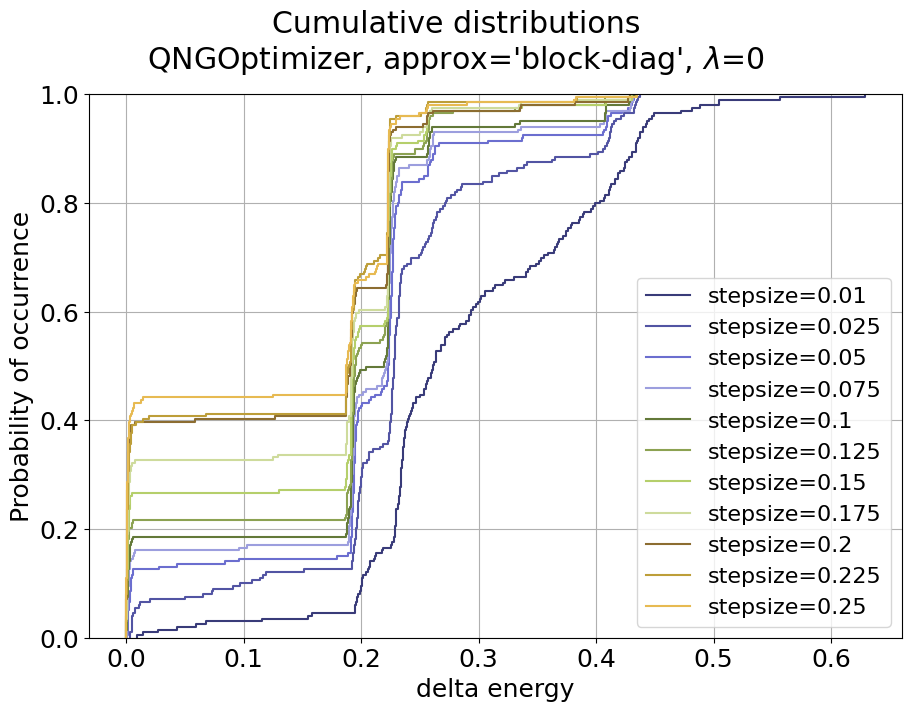

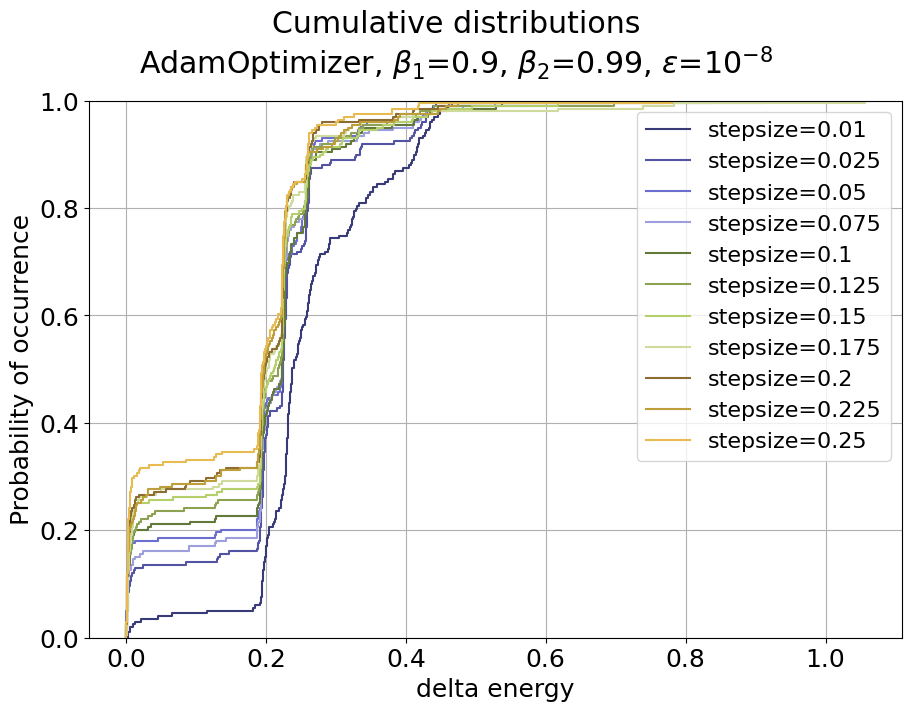

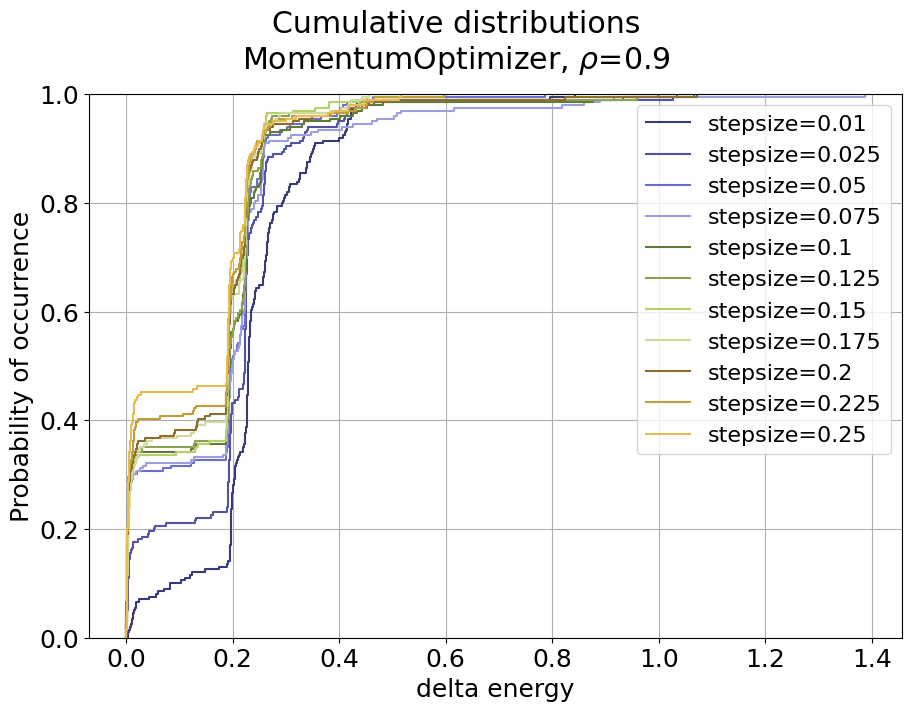

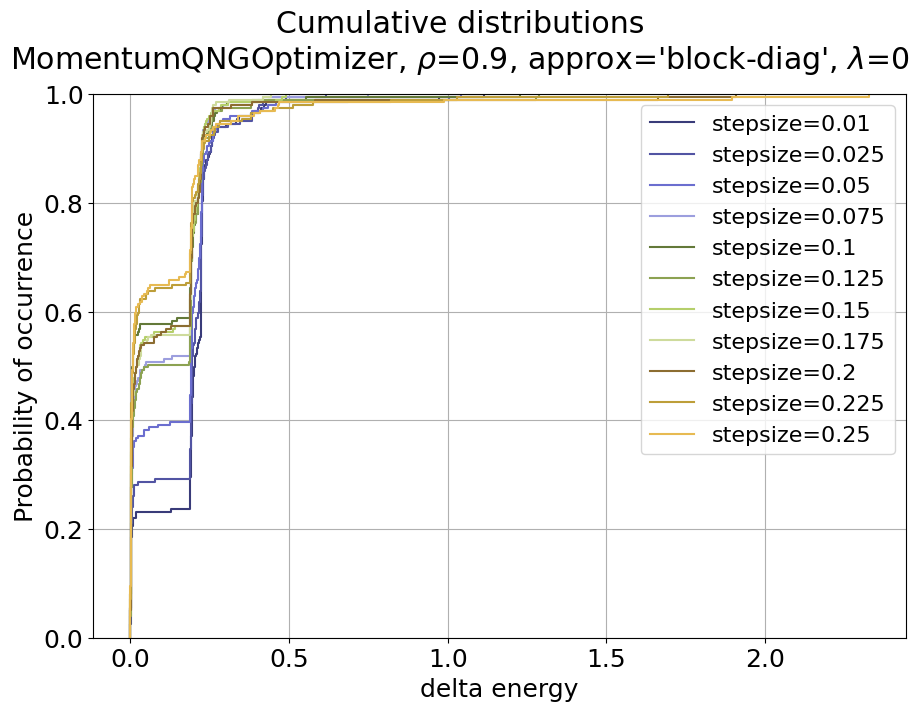

In [6]:
import matplotlib as mpl
from datetime import date
import ipynbname
from matplotlib import pyplot as plt
#ground_energy = -1.9083156
mpl.rcParams['font.size'] = 18

prefix_name =  "portfolio_6_" #ipynbname.name() + "_" + str(date.today()) + "_"

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)
    
    # Cumulative distributions.
    
    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_delta_energy[i][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
        
    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]
    
    fig.suptitle(title)
    
    axs.grid(True)
    axs.legend(fontsize=16)
    axs.set_xlabel("delta energy")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    #axs.set_xlim(0.0, 1)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.eps",format='eps',dpi=300)

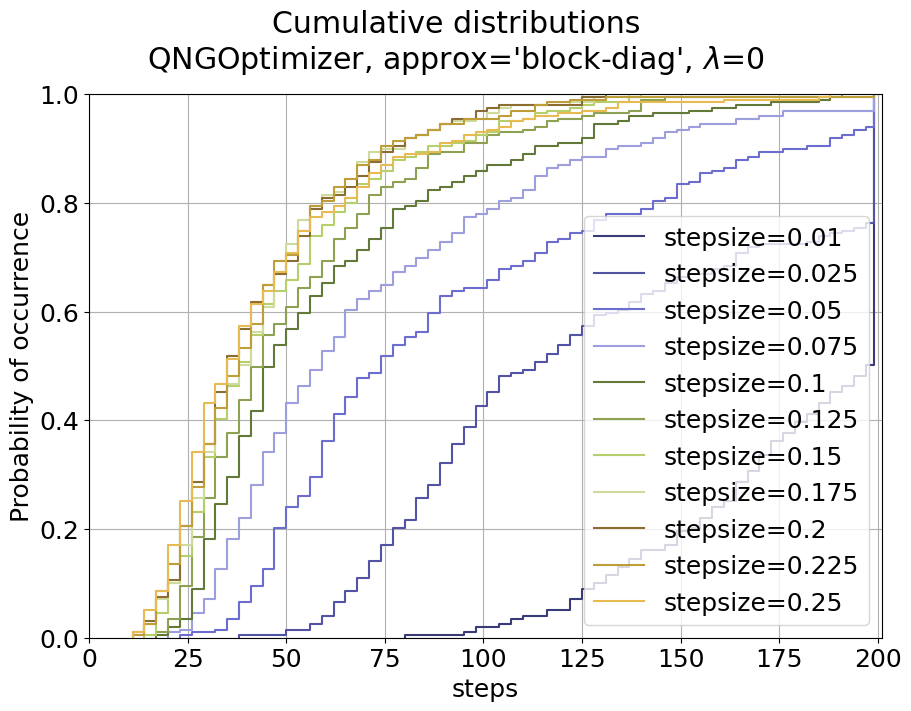

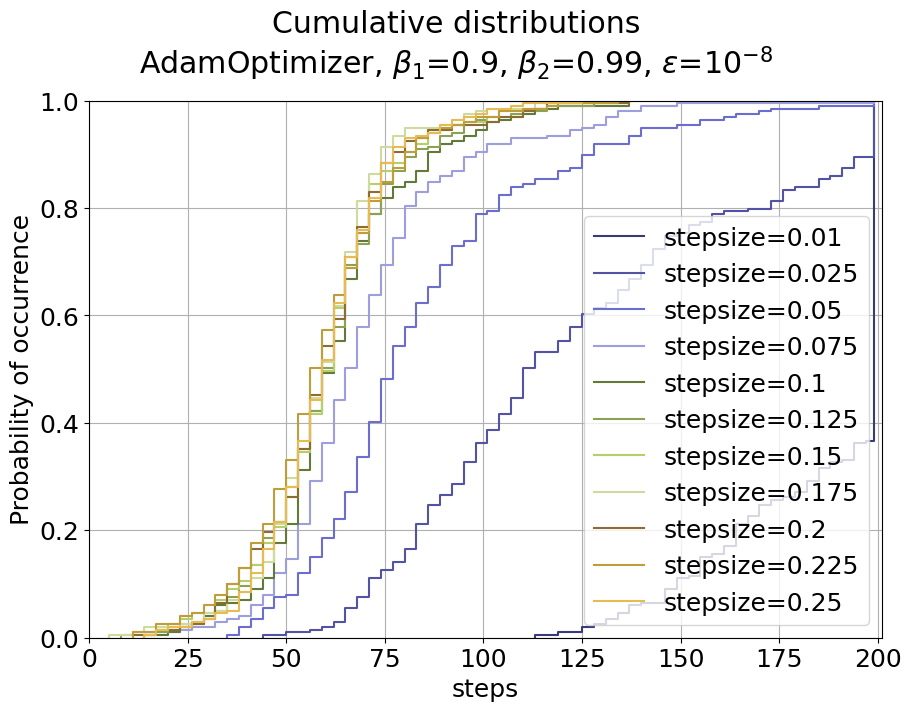

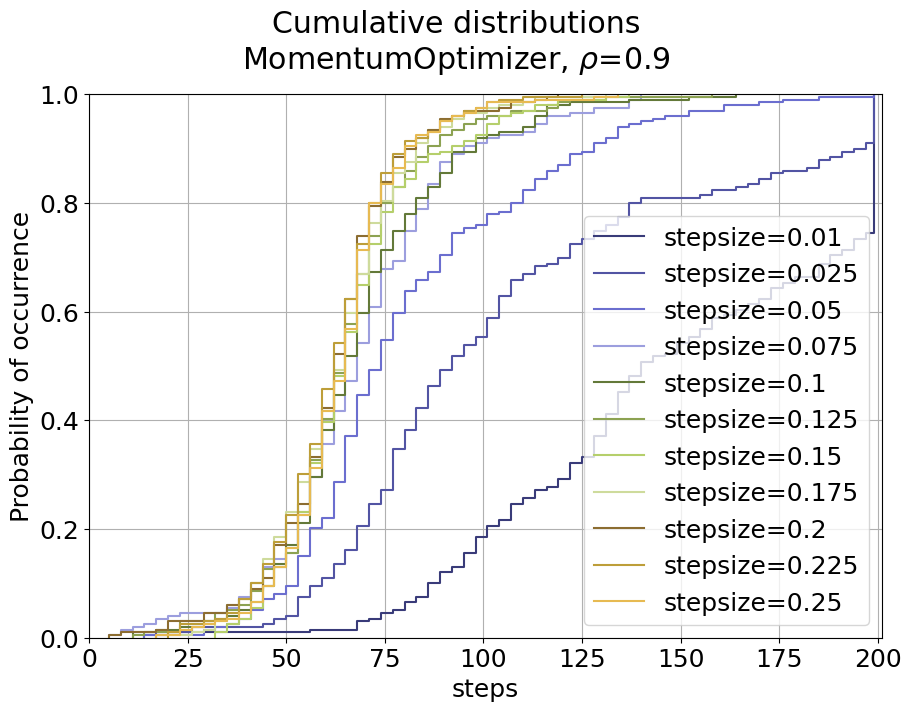

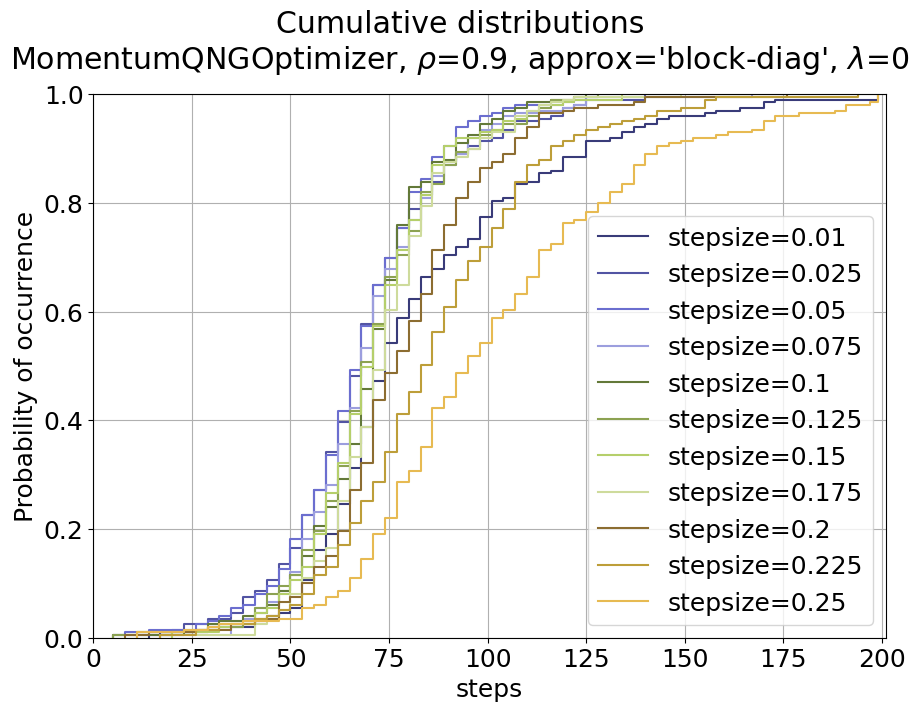

In [7]:
import matplotlib as mpl

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)
    
    # Cumulative distributions.
    
    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_steps[i][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
        
    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]
    
    fig.suptitle(title)
    
    axs.grid(True)
    axs.legend()
    axs.set_xlabel("steps")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, steps+1)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.eps",format='eps',dpi=300)

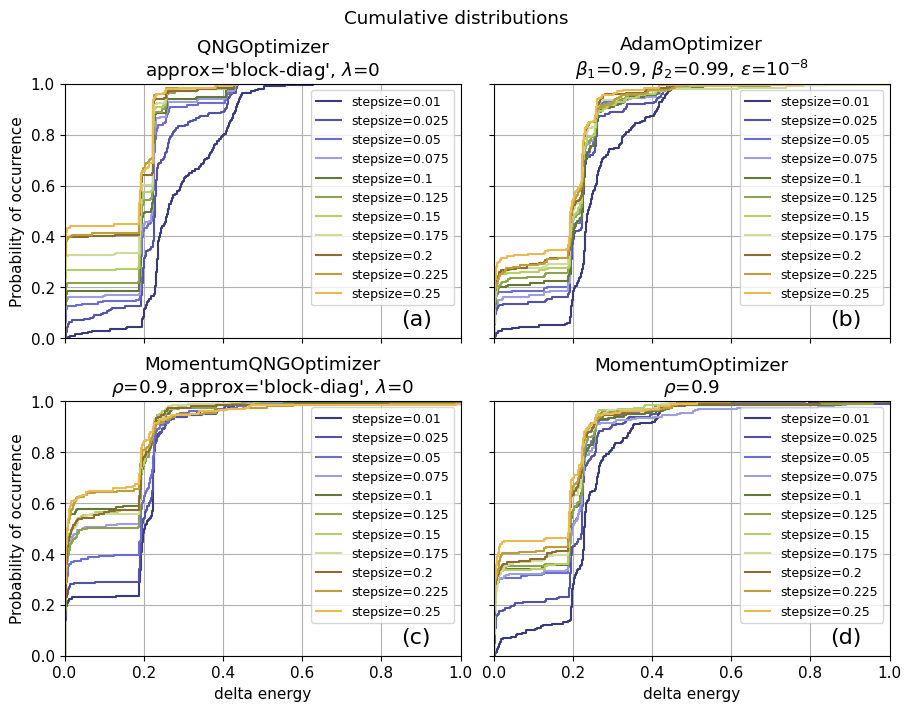

In [20]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    axs[0][0].ecdf(sessions_delta_energy[0][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_delta_energy[1][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_delta_energy[2][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_delta_energy[3][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]
axs[0][0].text(0.85,0.05,"(a)",fontsize=16)
axs[0][1].text(0.85,0.05,"(b)",fontsize=16)
axs[1][0].text(0.85,0.05,"(c)",fontsize=16)
axs[1][1].text(0.85,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("delta energy")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 1)
        axs[j][i].legend(loc="upper right",fontsize=9)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)
        
plt.show()
#fig.savefig(prefix_name + "delta_energy_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "delta_energy_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "delta_energy_ccdf.eps",format='eps',dpi=300)

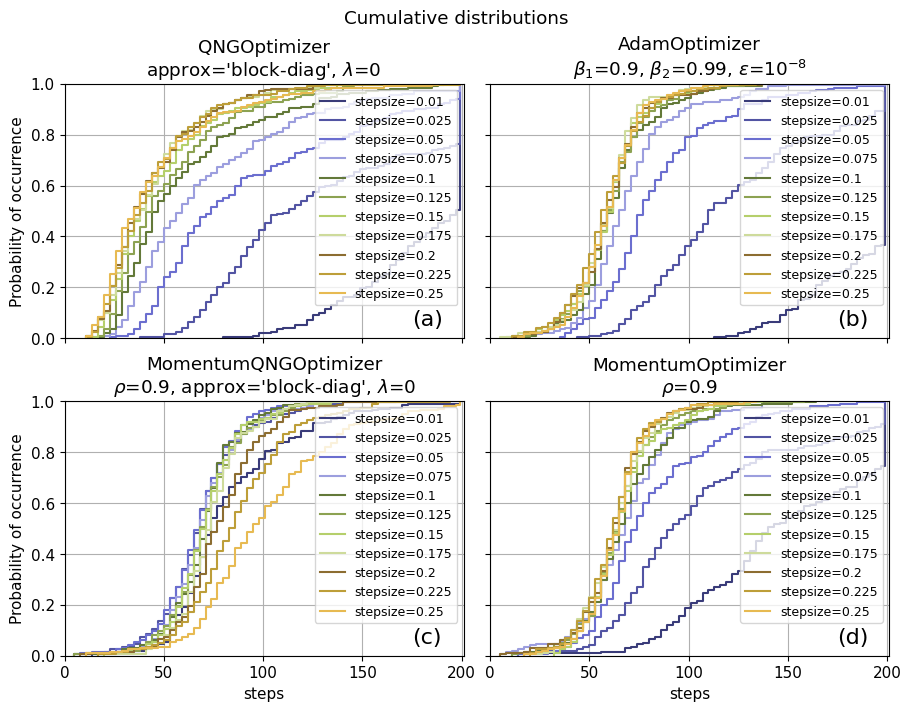

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    axs[0][0].ecdf(sessions_steps[0][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_steps[1][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_steps[2][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_steps[3][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]

axs[0][0].text(175,0.05,"(a)",fontsize=16)
axs[0][1].text(175,0.05,"(b)",fontsize=16)
axs[1][0].text(175,0.05,"(c)",fontsize=16)
axs[1][1].text(175,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("steps")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, steps+1)
        axs[j][i].legend(loc="upper right",fontsize=9)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)
        
plt.show()
#fig.savefig(prefix_name + "steps_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "steps_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "steps_ccdf.eps",format='eps',dpi=300)

In [10]:
#!pip install torch

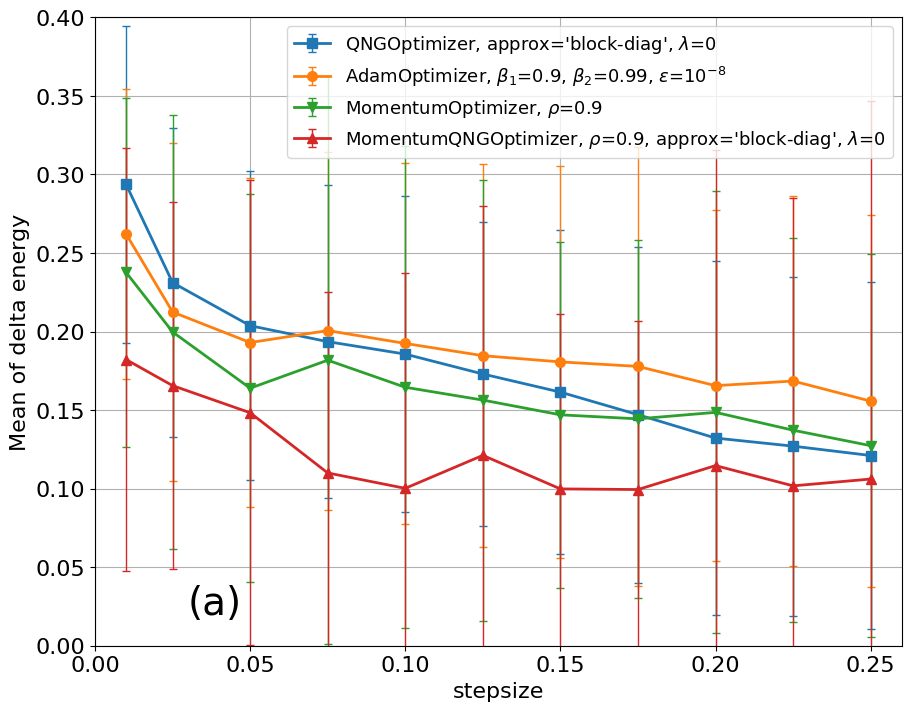

In [18]:
import matplotlib as mpl
import statistics
import math
import torch

mpl.rcParams['font.size'] = 16

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.03,0.02,"(a)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        delta = []
        for k in range(len(sessions_delta_energy[i][j])):
            delta.append(float(sessions_delta_energy[i][j][k]))
        ave_val = statistics.mean(delta)
        stdev_val = statistics.stdev(delta)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)
  
    axs.grid(True)
    axs.legend(fontsize=13)
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of delta energy")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 0.4)
plt.show()
#fig.savefig(prefix_name+"ave_delta_energy.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_delta_energy.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"ave_delta_energy.eps",format='eps',dpi=300)

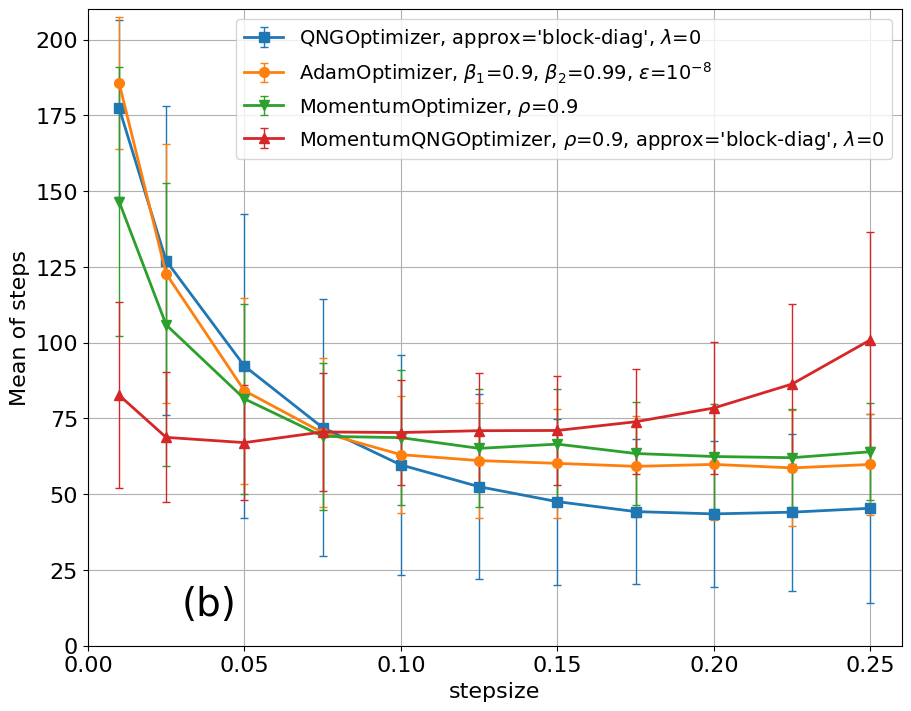

In [15]:
import matplotlib as mpl
import statistics
import math
import torch

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.03,10.0,"(b)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        arr_steps = []
        for k in range(len(sessions_steps[i][j])):
            arr_steps.append(float(sessions_steps[i][j][k]))
        ave_val = statistics.mean(arr_steps)
        stdev_val = statistics.stdev(arr_steps)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)
  
    axs.grid(True)
    axs.legend(fontsize=14)
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of steps")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 210)
plt.show()
#fig.savefig(prefix_name+"_ave_steps.png",format='png',dpi=300)
fig.savefig(prefix_name+"_ave_steps.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_steps.eps",format='eps',dpi=300)